In [215]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('Iris_data.csv')
df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [216]:
df['variety'][df['variety'] == 'Setosa'] = 0
df['variety'][df['variety'] == 'Virginica'] = 2
df['variety'][df['variety'] == 'Versicolor'] = 1

In [217]:
X = df.drop('variety', axis=1).values.tolist()
y = df['variety'].values

In [218]:
X

[[5.1, 3.5, 1.4, 0.2],
 [4.9, 3.0, 1.4, 0.2],
 [4.7, 3.2, 1.3, 0.2],
 [4.6, 3.1, 1.5, 0.2],
 [5.0, 3.6, 1.4, 0.2],
 [5.4, 3.9, 1.7, 0.4],
 [4.6, 3.4, 1.4, 0.3],
 [5.0, 3.4, 1.5, 0.2],
 [4.4, 2.9, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.1],
 [5.4, 3.7, 1.5, 0.2],
 [4.8, 3.4, 1.6, 0.2],
 [4.8, 3.0, 1.4, 0.1],
 [4.3, 3.0, 1.1, 0.1],
 [5.8, 4.0, 1.2, 0.2],
 [5.7, 4.4, 1.5, 0.4],
 [5.4, 3.9, 1.3, 0.4],
 [5.1, 3.5, 1.4, 0.3],
 [5.7, 3.8, 1.7, 0.3],
 [5.1, 3.8, 1.5, 0.3],
 [5.4, 3.4, 1.7, 0.2],
 [5.1, 3.7, 1.5, 0.4],
 [4.6, 3.6, 1.0, 0.2],
 [5.1, 3.3, 1.7, 0.5],
 [4.8, 3.4, 1.9, 0.2],
 [5.0, 3.0, 1.6, 0.2],
 [5.0, 3.4, 1.6, 0.4],
 [5.2, 3.5, 1.5, 0.2],
 [5.2, 3.4, 1.4, 0.2],
 [4.7, 3.2, 1.6, 0.2],
 [4.8, 3.1, 1.6, 0.2],
 [5.4, 3.4, 1.5, 0.4],
 [5.2, 4.1, 1.5, 0.1],
 [5.5, 4.2, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.2],
 [5.0, 3.2, 1.2, 0.2],
 [5.5, 3.5, 1.3, 0.2],
 [4.9, 3.6, 1.4, 0.1],
 [4.4, 3.0, 1.3, 0.2],
 [5.1, 3.4, 1.5, 0.2],
 [5.0, 3.5, 1.3, 0.3],
 [4.5, 2.3, 1.3, 0.3],
 [4.4, 3.2, 1.3, 0.2],
 [5.0, 3.5,

In [219]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

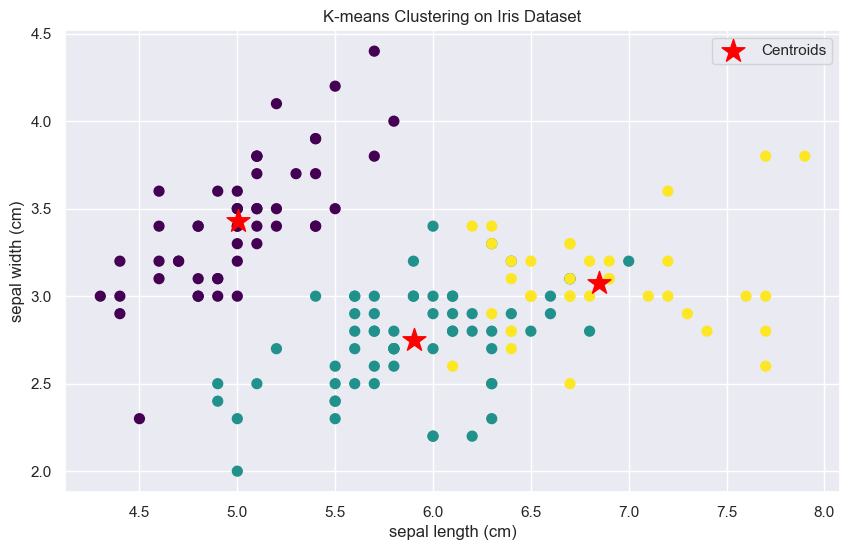

Cluster Centers:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.006000          3.428000           1.462000          0.246000
1           5.901613          2.748387           4.393548          1.433871
2           6.850000          3.073684           5.742105          2.071053


In [220]:
# Number of clusters
k = 3

# Applying K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Adding cluster labels to the dataset
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 6))

# Plotting clusters based on the first two features (change as needed)
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means Clustering on Iris Dataset')
plt.legend()
plt.show()

# Displaying the cluster centers
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=iris.feature_names))


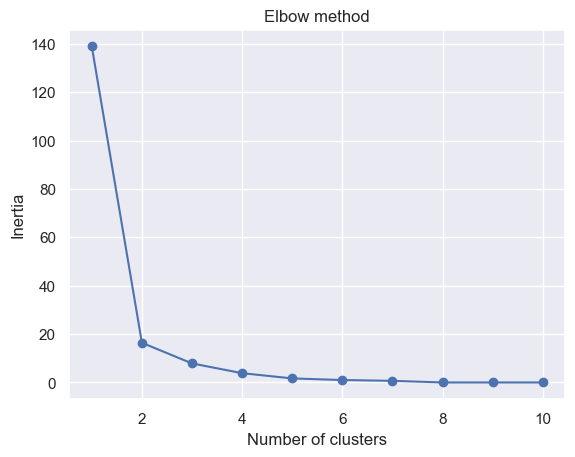

In [221]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()